This notebook aims to assess the generalization accuracy of a generated suffix, assuming a data-split was used during training.

In [5]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
from copy import deepcopy
import pandas as pd
from tqdm import tqdm
from collections import defaultdict
from transformers import AutoTokenizer
import pandas as pd
import seaborn as sns
from types import SimpleNamespace
from datasets import Dataset
from os.path import join as oj
import pickle as pkl
import os
import dvu
dvu.set_style()
import analyze_utils
import sys
sys.path.append('..')
import data
from model_utils import prompt_classification

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
class fake_args:
    template_num_task_phrasing = 0
    max_dset_size = 1000
    max_digit = 10
    seed = 1
    train_split_frac = 0.75

    # these will be varied
    n_shots = 1
    task_name = 'add_two'
args = fake_args()
np.random.seed(args.seed)

ds = []
results_dir = '../results/generalization_acc/'
checkpoints = ['EleutherAI/gpt-j-6B']
for checkpoint in checkpoints: #, 'gpt2-xl']:['gpt2-medium']:
    d = pd.DataFrame.from_dict(pkl.load(open(
        oj(results_dir, f'baseline_accs_{checkpoint.replace("/", "___")}.pkl'), 'rb')))
    ds.append(deepcopy(d))
df = pd.concat(ds)

In [45]:
df['prompt'][df['prompt'] == ''] = 'no prompt'
df = df.sort_values('acc')

/tmp/ipykernel_1443099/3719344165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prompt'][df['prompt'] == ''] = 'no prompt'


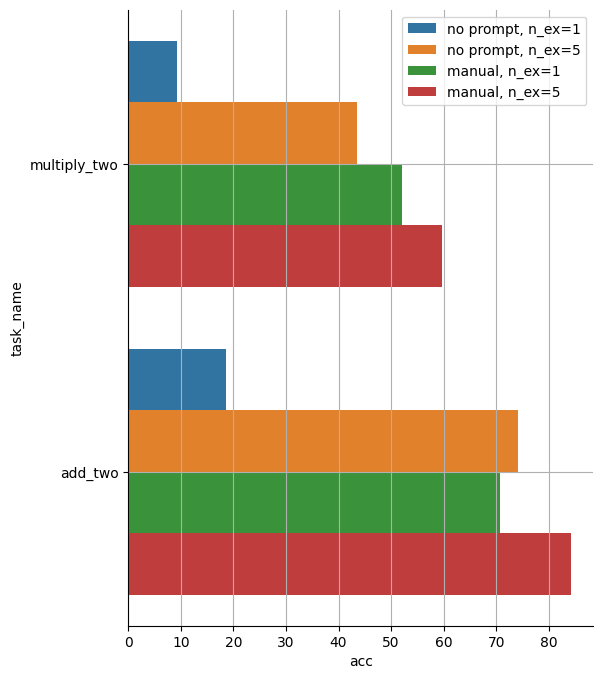

In [46]:
plt.figure(figsize=(6, 8))
ax = sns.barplot(y='task_name', x='acc', data=df, hue=(df['prompt'] + ', n_ex=' + df['n_shots'].astype(str)))
ax.grid()
plt.show()

# Manually inspect prompts

In [6]:

for task_name in task_names:
    (dset, dset_test), check_answer_func, descr = data.get_data(
        args, task_name, n_shots=args.n_shots, train_split_frac=args.train_split_frac)
    print(task_name, descr, dset[0], end='\n\n')

add_two Return the sum of the inputs. {'text': 'Given the input numbers 8 and 0, the answer is 8.\n\n', 'input': 'Given the input numbers 8 and 0, the answer is', 'output': ' 8.\n\n', '__index_level_0__': 80}

multiply_two Return the product of the inputs. {'text': 'Given the input numbers 4 and 4, the answer is 16.\n\n', 'input': 'Given the input numbers 4 and 4, the answer is', 'output': ' 16.\n\n', '__index_level_0__': 44}

divide_two Return the quotient of the inputs. {'text': 'Given the input numbers 9 and 5, the answer is 9/5.\n\n', 'input': 'Given the input numbers 9 and 5, the answer is', 'output': ' 9/5.\n\n', '__index_level_0__': 95}

subtract_two Return the difference of the inputs. {'text': 'Given the input numbers 4 and 0, the answer is 4.\n\n', 'input': 'Given the input numbers 4 and 0, the answer is', 'output': ' 4.\n\n', '__index_level_0__': 40}

max_two Return the maximum of the inputs. {'text': 'Given the input numbers 8 and 9, the answer is 9.\n\n', 'input': 'Given t